# Predicting Of Survival Of People In Titanic

## Data:-

>* The data has been split into two groups:
 training set (train.csv)
 test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

>*The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

> Variable Notes

>* pclass: A proxy for socio-economic status (SES)
>>* 1st = Upper
>>* 2nd = Middle
>>* 3rd = Lower

>* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

>* sibsp: The dataset defines family relations in this way...

>* Sibling = brother, sister, stepbrother, stepsister

>* Spouse = husband, wife (mistresses and fiancés were ignored)

>* parch: The dataset defines family relations in this way...

>* Parent = mother, father

>* Child = daughter, son, stepdaughter, stepson

>* Some children travelled only with a nanny, therefore parch=0 for them.

Import required tools

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from yellowbrick.classifier import classification_report, confusion_matrix

In [2]:
# Data

train_df = pd.read_csv("Data/Train Data.csv")
test_df = pd.read_csv("Data/test.csv")

### EDA 

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
train_df.isna().sum()/len(train_df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

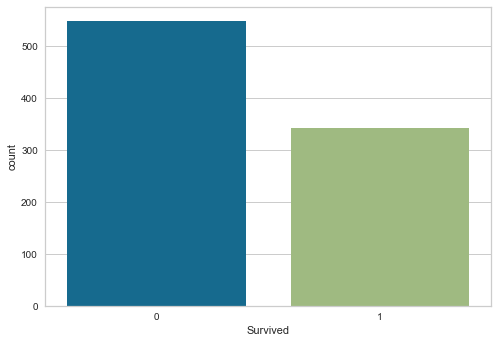

In [8]:
# Count Plot
sns.countplot(x=train_df.Survived)

In [9]:
len(train_df.PassengerId)

891

In [10]:
# Same as data points least imp col

In [11]:
train_df.Sex.unique()

array(['male', 'female'], dtype=object)

In [12]:
train_df.Ticket.nunique() , train_df.Name.nunique()

(681, 891)

In [13]:
# This features also wont help in predition

In [14]:
nan_features = [ feature for feature in train_df if train_df[feature].isna().sum() > 1]
nan_features

['Age', 'Cabin', 'Embarked']

In [15]:
# numeric_features = [ feature for feature , content in  train_df.items() if  content.dtype != 'object'  ]
# numeric_features




# numeric_feat = []

# for label, content in train_df.items():
#     if pd.api.types.is_numeric_dtype(content):
#         numeric_feat.append(label)
        
# numeric_feat        

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
for lable, content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(lable)

Age


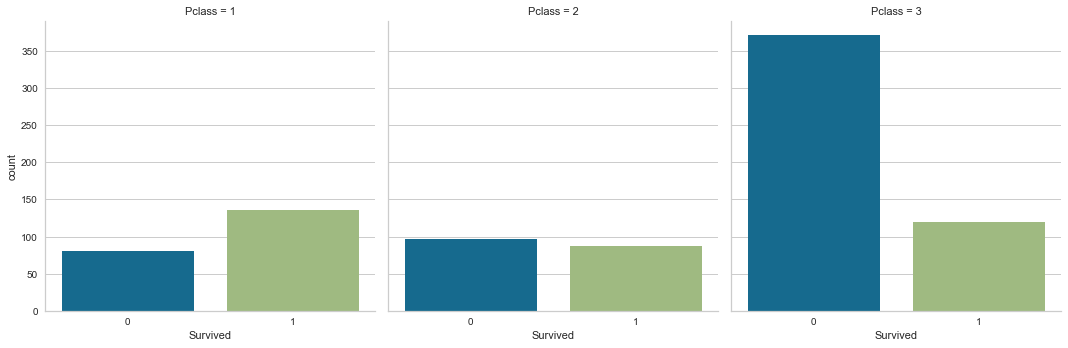

In [18]:
sns.catplot(x='Survived', col='Pclass' , kind='count', data=train_df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

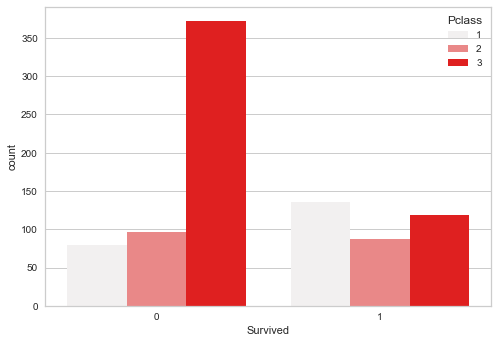

In [19]:
# sns.catplot(x='Survived', col='Pclass' , kind='count', data=train_df)


sns.countplot(x = "Survived" , hue= "Pclass" , data=train_df, color="red")

**NOTE** - This clearly shows that passengers in class 3 were mostly died. Obvsly higher class people were rescued first

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

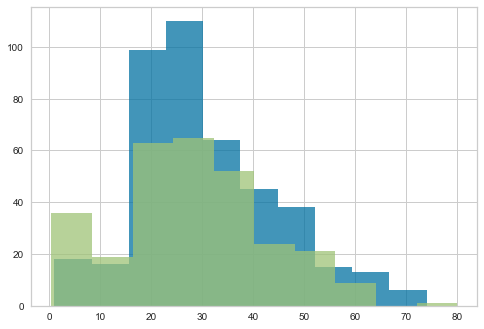

In [20]:
train_df.groupby("Survived").Age.hist(alpha=0.75)

In [21]:
categorical_features = [ feature for feature, content in train_df.items() if content.dtype == "object"]
categorical_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

<AxesSubplot:xlabel='Survived', ylabel='count'>

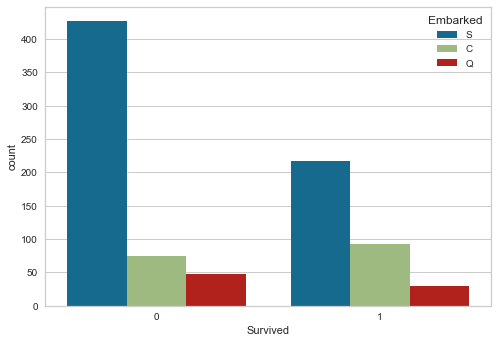

In [22]:
sns.countplot(x = "Survived" , data=train_df , hue= "Embarked") #color= "blue")

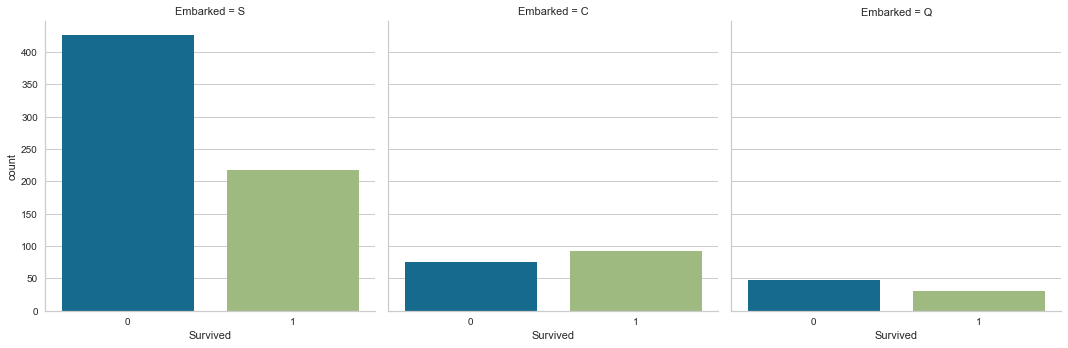

In [23]:
sns.catplot(x = "Survived", kind="count", col="Embarked", data=train_df)

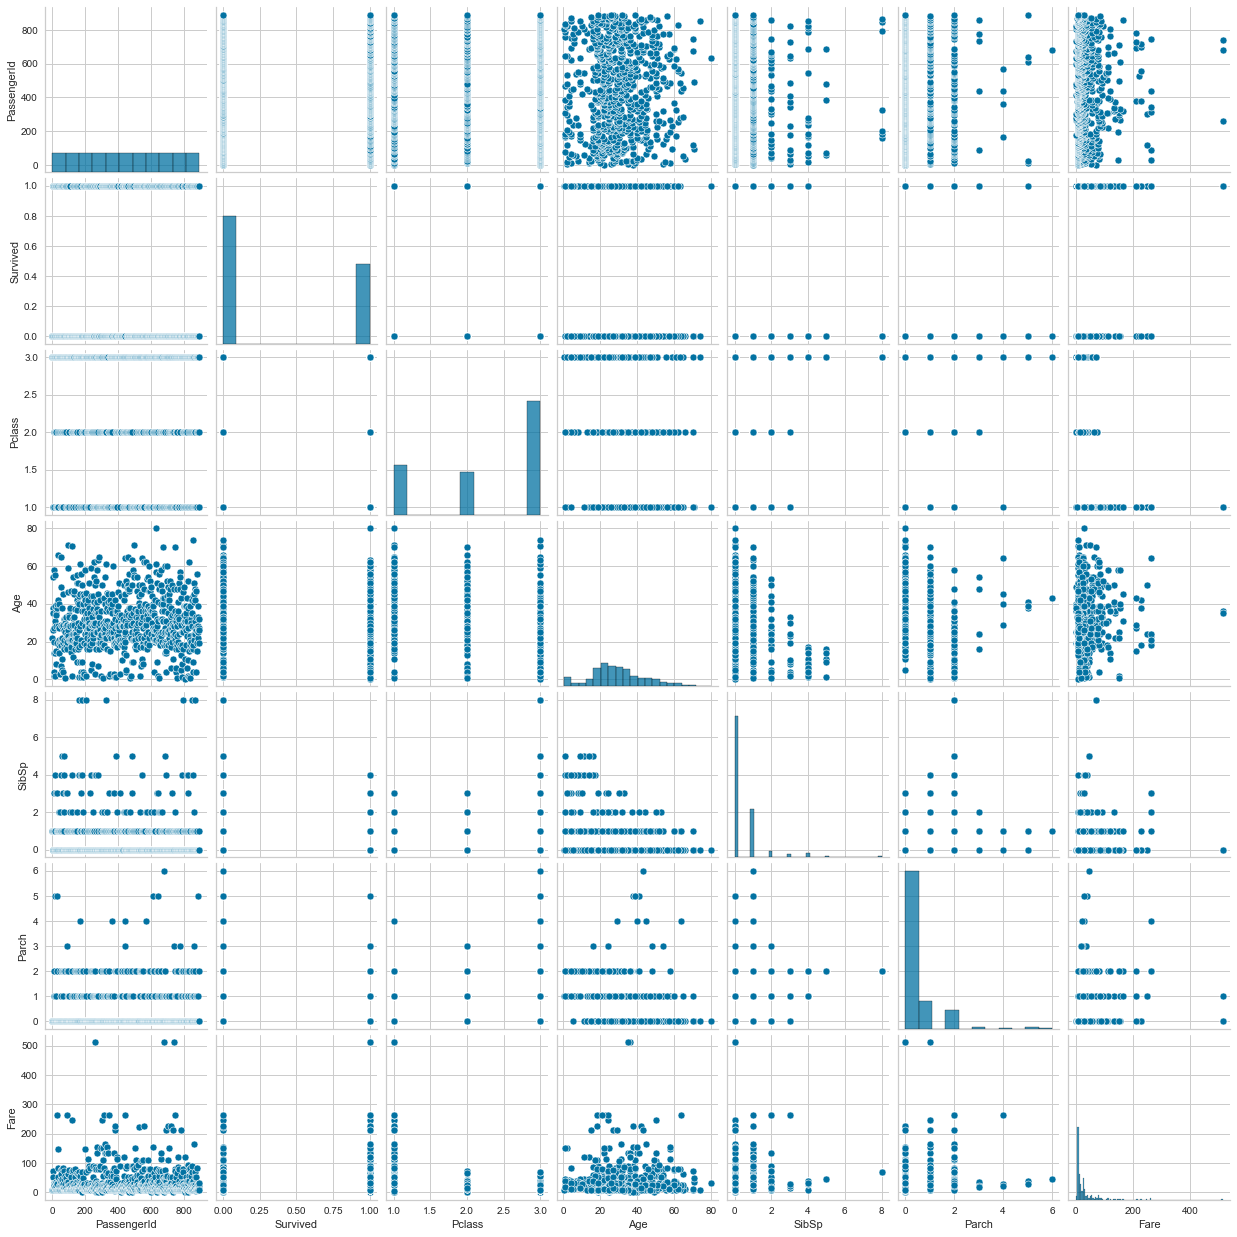

In [24]:
sns.pairplot(train_df)

## Feature Engineering
>* From eda we see that some columns are not that important for prediction of survivals ex. passangersId, Name
>* Some might be important like age, sex

In [25]:
train_df_tmp = train_df.copy()

In [26]:
train_df_tmp.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
train_df_tmp

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [27]:
train_df_tmp.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [28]:
train_df_tmp.Age.median()

28.0

In [29]:
# Filling missing values in num cols.

train_df_tmp.Age.fillna(28, inplace=True)

In [30]:
train_df_tmp.Age.isna().sum()

0

In [31]:
# Cabin colums is not much informative so will remove that column
train_df_tmp.drop("Cabin", axis=1, inplace=True)

In [32]:
train_df_tmp.isna().sum()         # 2 rows with missing

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [33]:
train_df_tmp.dropna(inplace=True)

In [34]:
train_df_tmp_2 = pd.get_dummies(train_df_tmp, drop_first=False)

In [35]:
# Split data 
X = train_df_tmp_2.drop("Survived", axis=1)
y = train_df_tmp_2.Survived

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 0 )

In [38]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((666, 10), (223, 10), (666,), (223,))

In [39]:
X_train.corr()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Pclass,1.000000,-0.360897,0.090441,0.055524,-0.532768,-0.140956,0.140956,-0.231847,0.202911,0.078842
Age,-0.360897,1.000000,-0.242943,-0.149844,0.105630,-0.068008,0.068008,0.016752,-0.033174,0.005774
SibSp,0.090441,-0.242943,1.000000,0.420507,0.134462,0.161516,-0.161516,-0.067008,-0.003734,0.061436
Parch,0.055524,-0.149844,0.420507,1.000000,0.188691,0.263502,-0.263502,-0.023787,-0.060977,0.058768
Fare,-0.532768,0.105630,0.134462,0.188691,1.000000,0.179641,-0.179641,0.266929,-0.103519,-0.171377
Sex_female,-0.140956,-0.068008,0.161516,0.263502,0.179641,1.000000,-1.000000,0.067525,0.064413,-0.099488
Sex_male,0.140956,0.068008,-0.161516,-0.263502,-0.179641,-1.000000,1.000000,-0.067525,-0.064413,0.099488
Embarked_C,-0.231847,0.016752,-0.067008,-0.023787,0.266929,0.067525,-0.067525,1.000000,-0.148504,-0.790304
Embarked_Q,0.202911,-0.033174,-0.003734,-0.060977,-0.103519,0.064413,-0.064413,-0.148504,1.000000,-0.488558
Embarked_S,0.078842,0.005774,0.061436,0.058768,-0.171377,-0.099488,0.099488,-0.790304,-0.488558,1.000000


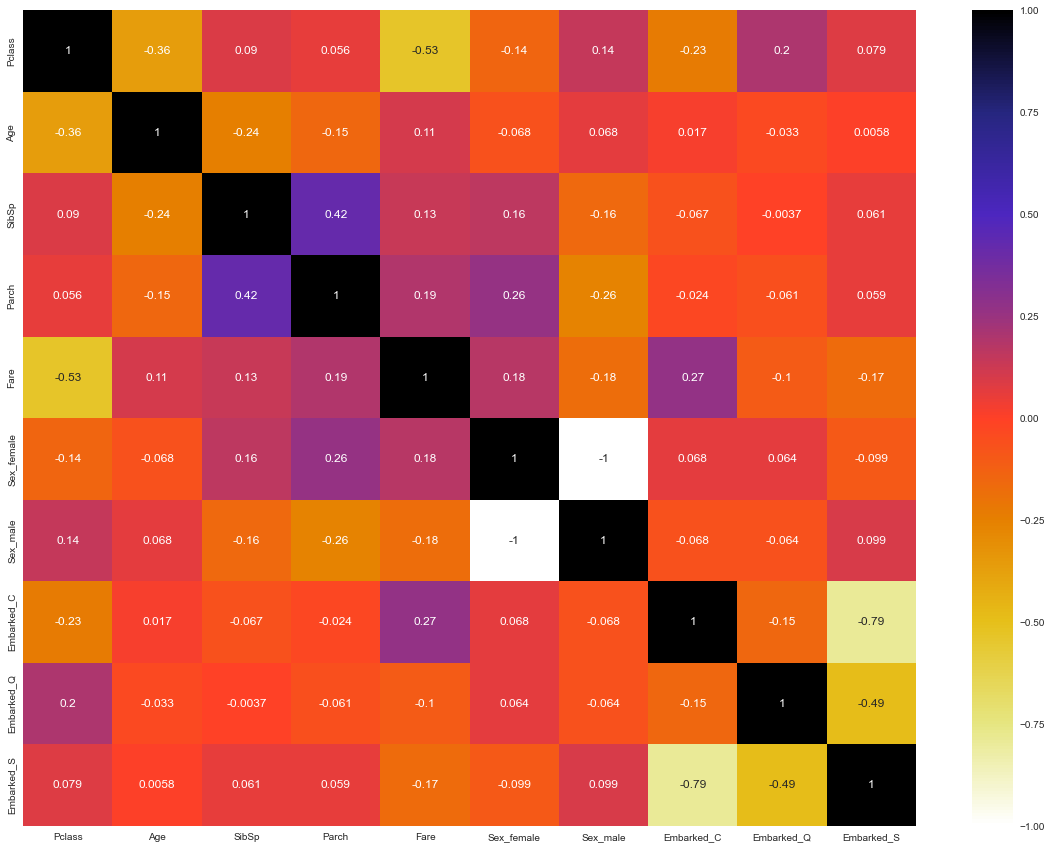

In [40]:
plt.figure(figsize=(20,15))
corr = X_train.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [41]:
# No feature is highly co-related so no chance of duplicasy

## Model Building

In [42]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier


In [43]:
models_dict={"random forest": RandomForestClassifier(),
       'GBC': GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier()}

In [44]:
def get_scores(model,x_train,x_test,y_train,y_test):
    
    np.random.seed(0)
    
    # make dict for keeping model score
    model_score = {}
    for name, model in model.items():
        model.fit(x_train,y_train)
      
        model_score[name]= model.score(x_test,y_test)
    
    return model_score
    
    

In [45]:
models_scores= get_scores(models_dict,X_train,X_val,y_train,y_val)
models_scores

{'random forest': 0.7757847533632287,
 'GBC': 0.7713004484304933,
 'KNN': 0.6860986547085202}

In [46]:
models_scores= pd.DataFrame(models_scores, index=['accuracy'])
models_scores

,random forest,GBC,KNN
accuracy,0.775785,0.7713,0.686099


<AxesSubplot:>

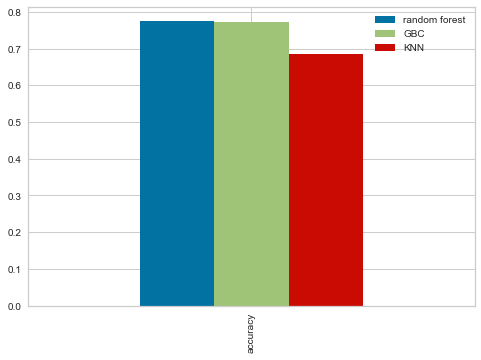

In [47]:
models_scores.plot.bar()

In [48]:
# We will hypertune the RF and GB model.


### Random Forest

In [51]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 

In [52]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [53]:
rf_model = RandomizedSearchCV(RandomForestClassifier(random_state=0),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=100)

In [55]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])})

In [56]:
rf_model.best_params_

{'n_estimators': 960,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': None}

In [57]:
rf_model.score(X_train, y_train)

0.9579579579579579

### Gradient Boost Model

In [58]:
gbc_grid = {'min_samples_split':[2,10,30,60],
            'min_samples_leaf':[1,3,5,7],
            'max_features':range(7,20,2),
           'max_depth':[3,4,5],
           'learning_rate':[0.15,0.1,0.05,0.01],
            'n_estimators':[100,500,750,1000]}

In [59]:
gbc2_model= RandomizedSearchCV(GradientBoostingClassifier(random_state=0,subsample=0.9),
                        param_distributions=gbc_grid,
                        cv=5,
                        n_iter=100)

In [60]:
%%time
gbc2_model.fit(X_train,y_train)

C:\Users\SAGAR KESHAVE\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
345 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
345 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SAGAR KESHAVE\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAGAR KESHAVE\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 586, in fit
    n_stages = self._fit_stages(
  File "C:\Users\SAGAR KESHAVE\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 663, in _fit_stages
    raw_predictions = self._fit_stage(
  File 

CPU times: total: 1min 35s
Wall time: 1min 39s


RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(random_state=0,
                                                        subsample=0.9),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.15, 0.1, 0.05,
                                                          0.01],
                                        'max_depth': [3, 4, 5],
                                        'max_features': range(7, 20, 2),
                                        'min_samples_leaf': [1, 3, 5, 7],
                                        'min_samples_split': [2, 10, 30, 60],
                                        'n_estimators': [100, 500, 750, 1000]})

In [61]:
gbc2_model.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': 9,
 'max_depth': 4,
 'learning_rate': 0.01}

In [62]:
gbc2_model.score(X_train,y_train)

0.9099099099099099

In [66]:
gbc2_model.score(X_val, y_val)

0.8026905829596412

In [63]:
### Random Forest Model have given the best sccore

In [ ]:
{'n_estimators': 960,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': None}

In [65]:
best_model = RandomForestClassifier(n_estimators=960,
                                    min_samples_split=4, 
                                    min_samples_leaf=1, 
                                    max_depth=None, 
                                    random_state=0)

best_model.fit(X_train,y_train)
best_model.score(X_val,y_val)

0.8071748878923767

C:\Users\SAGAR KESHAVE\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


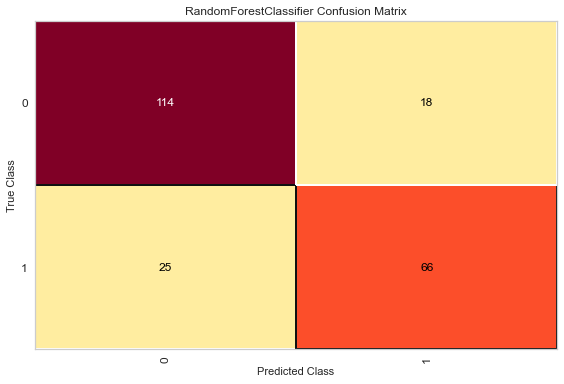

In [67]:
confusion_matrix(best_model,X_train, y_train, X_val, y_val );

C:\Users\SAGAR KESHAVE\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


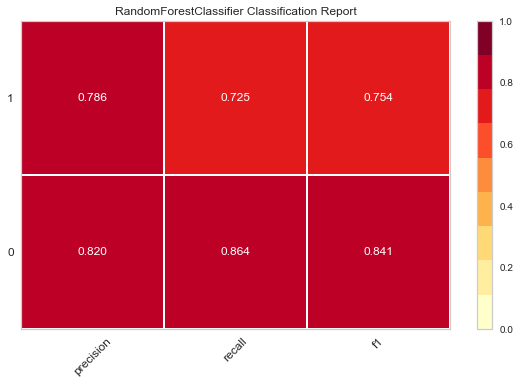

In [68]:
classification_report(best_model,X_train, y_train, X_val, y_val );

In [69]:
best_model.feature_importances_

array([0.09209669, 0.21755253, 0.04889229, 0.04003388, 0.22759919,
       0.16765837, 0.16108795, 0.01295095, 0.01227121, 0.01985694])

In [70]:

def plot_feature(columns, importances, n=20 ):
    df_ =(pd.DataFrame({'features':columns,
                      'feature_importances':importances})
         .sort_values('feature_importances', ascending=False)
         .reset_index(drop=True))
    sns.barplot(x='feature_importances',
                y='features',
               data=df_[:n],
               )

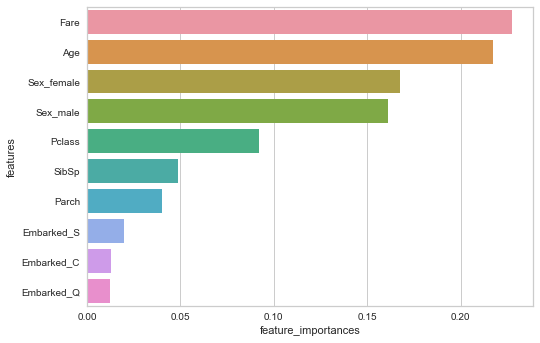

In [71]:
plot_feature(X_train.columns,best_model.feature_importances_)